In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans     ##sklearn = skykit


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("Countries.csv")

In [10]:
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [19]:
df.shape

(241, 3)

In [20]:
df.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [13]:
x = df["Longitude"]
y = df["Latitude"]

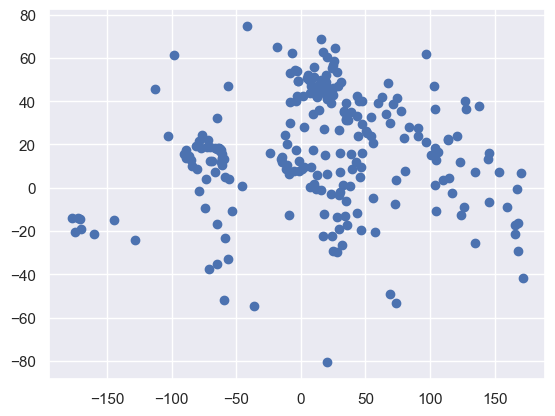

In [21]:
plt.scatter(x, y)     # "plt.scatter" is used because i imported "import matplotlib.pyplot as plt" instead of "from matplotlib import pyplot"
plt.show()

In [24]:
cluster_data = df.iloc[:,[1,2]]   #all the rows and 1 & 2 columns

In [25]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [28]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [29]:
cluster_data

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683
...,...,...
236,-2.593510,-1.166941
237,0.464368,-0.047553
238,0.151237,-1.742328
239,0.188681,-1.155809


In [36]:
cluster_data.mean()

Longitude    8.061785e-18
Latitude     1.197751e-17
dtype: float64

In [35]:
cluster_data.std()

Longitude    1.002081
Latitude     1.002081
dtype: float64

In [39]:
kmeans = KMeans(4)

In [40]:
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [41]:
identified_clusters = kmeans.fit_predict(cluster_data)

In [42]:
identified_clusters

array([0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 0, 3, 2, 3, 0, 2, 1, 1, 3, 1, 3, 3,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 1, 3,
       1, 1, 3, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 0,
       2, 0, 2, 3, 0, 1, 0, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 3, 1, 2, 0, 0, 2, 1, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1, 1, 1,
       2, 0, 1, 1, 1, 3, 2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 3, 1, 0, 3, 3, 2,
       3, 2, 3, 2, 3, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 3, 1, 0, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 0, 1, 3,
       3, 1, 1, 3, 0, 1, 1, 1, 3, 0, 3, 1, 0, 3, 3, 2, 1, 1, 2, 0, 0, 1,
       1, 2, 3, 3, 1, 3, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 3, 3])

In [43]:
new_dataframe = df.copy()

In [45]:
new_dataframe.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [46]:
new_dataframe['clusterNo'] = identified_clusters

In [47]:
new_dataframe.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


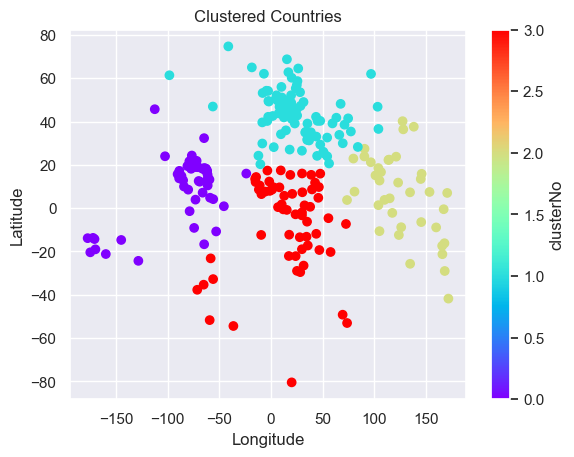

In [55]:
plt.scatter(new_dataframe['Longitude'], new_dataframe['Latitude'], c = new_dataframe['clusterNo'], cmap= 'rainbow' )
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustered Countries")
plt.colorbar(label= 'clusterNo')
plt.show()

In [56]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
wcss

[481.99999999999994,
 304.03529335762437,
 182.71427961732408,
 140.72852430229963,
 109.2042204760742,
 88.68727655511972,
 71.43381611759206,
 61.719811632202266,
 51.778202703733015,
 46.106246549631294]

Text(0, 0.5, 'Within-cluster Sum of Squares')

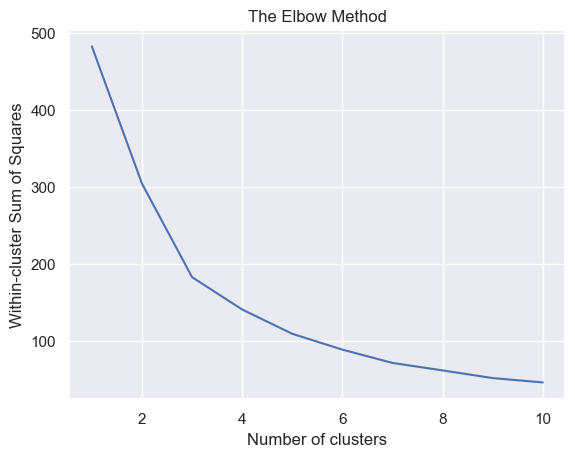

In [58]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')


identify the features
standerdization
use kmeans
fit it
then plot